# Ford GoBike
## by ziad

## Preliminary Wrangling

> the document explores a dataset contining 13 colums and 519700 rows of bike trip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.figure import Figure
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
print(df.info())
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB
N

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [5]:


#change data type of start_time and end_time from obj to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
# after converting , add new column for a month
df['year_month'] = pd.to_datetime(df['start_time']).dt.month_name(locale = 'English')
df.info()
df.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,year_month
468181,750,2017-08-02 20:50:43.009,2017-08-02 21:03:13.714,58,Market St at 10th St,37.776619,-122.417385,24,Spear St at Folsom St,37.789677,-122.390428,2100,Subscriber,August
276137,483,2017-10-04 22:53:31.702,2017-10-04 23:01:34.832,66,3rd St at Townsend St,37.778742,-122.392741,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,3188,Customer,October


In [6]:
## https://www.geeksforgeeks.org/python-pandas-series-dt-month_name/

### What is the structure of your dataset?

> there are 519700 bike in this dataset and 13 columns (duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type')

### What is/are the main feature(s) of interest in your dataset?

> I'm most interest in figur out the best time of the year for a trip and what kind of user type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the year_month ,duration_sec and user_type will help a lot.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## What is the average for duration bike (sec) ?

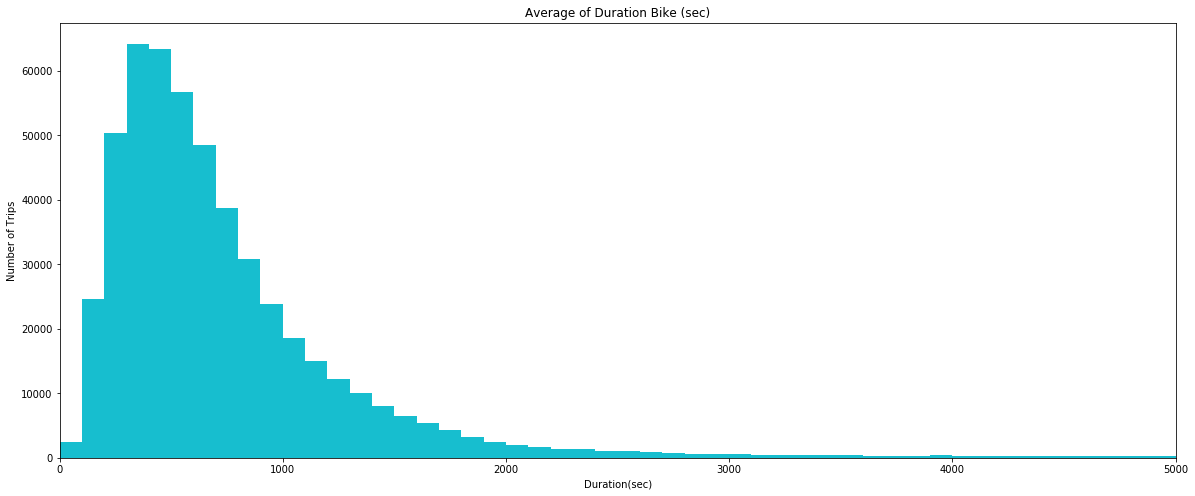

In [7]:
base_color = sb.color_palette()[9]
binsize = 100
bins = np.arange(0, df['duration_sec'].max()+binsize ,binsize )
plt.figure(figsize=[20, 8])
plt.hist(data = df, x = 'duration_sec', bins = bins , color = base_color );
plt.title('Average of Duration Bike (sec)');
plt.xlabel('Duration(sec)');
plt.ylabel('Number of Trips');
plt.xlim(0, 5000);
plt.show()

- The average of duration is a approximately 500 sec .

## What are the most user for ford bike ?

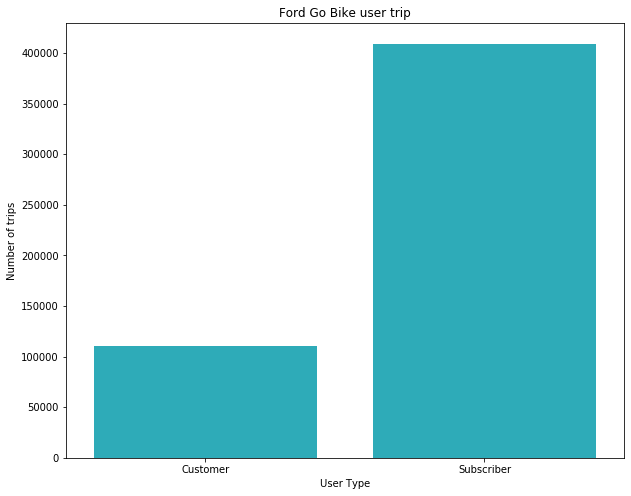

In [8]:
base_color = sb.color_palette()[9]
plt.figure(figsize=[10, 8])
g =sb.countplot(data = df, x = 'user_type', color = base_color )
g.set_title('Ford Go Bike user trip', fontsize=12)
plt.xlabel("User Type")
plt.ylabel("Number of trips");


- The bar chart shows that the subscribers are the most user type.

## What is the most riding month?

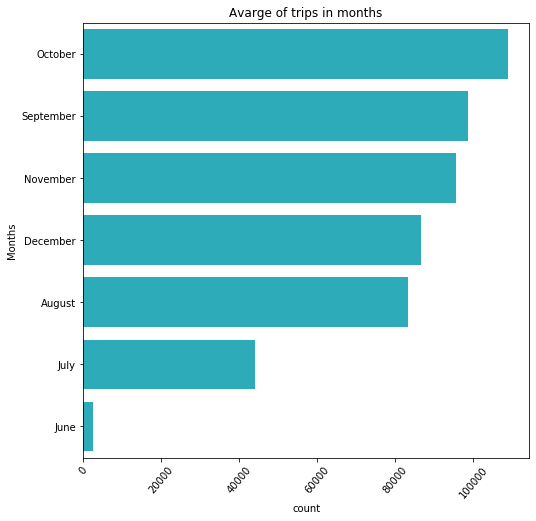

In [9]:
base_color = sb.color_palette()[9]
plt.figure(figsize=[8, 8])
year_month_order = df['year_month'].value_counts().index
sb.countplot(data = df, y= 'year_month', color = base_color,order =year_month_order)
plt.title('Avarge of trips in months')
plt.ylabel('Months');
plt.xticks(rotation = 50);

- The most riding month is october.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

 ## What is the  duration average for both user type ?

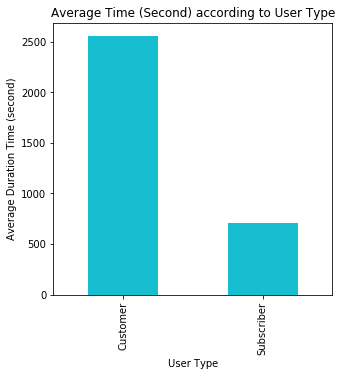

In [10]:
base_color = sb.color_palette()[9]
axx = df.groupby('user_type')['duration_sec'].mean().plot(kind='bar',color = base_color, figsize=(5,5))
axx.set_title('Average Time (Second) according to User Type', fontsize=12)
axx.set_xlabel('User Type')
axx.set_ylabel('Average Duration Time (second)');

- the customer spend more time than subscribers.

## What is the relationship between duration and month

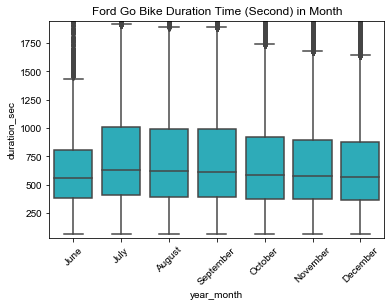

In [11]:
base_color = sb.color_palette()[9]
ax = sb.boxplot(data = df, x = 'year_month', y = 'duration_sec',order=["June", "July", "August","September","October","November","December"], color = base_color)
ax.set(ylim=(30, 1950))
ax.set_title('Ford Go Bike Duration Time (Second) in Month', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sb.set(rc={'figure.figsize':(12,10)})


- the highest distribution of trip duration time located in July while the lowest distribution of  trip duration time located in June.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Duration over months according to user type

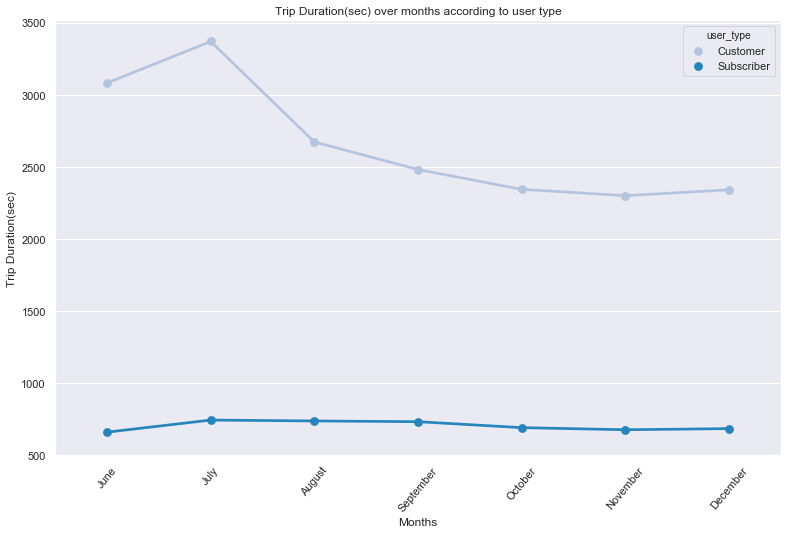

In [12]:
plt.figure(figsize = [13,8]);
axx = sb.pointplot(data=df,x='year_month',y='duration_sec',hue='user_type' ,color=sb.color_palette()[9], order=["June", "July", "August","September","October","November","December"],palette='PuBu', ci=None)
plt.xlabel('Months')
plt.ylabel('Trip Duration(sec)')
plt.title('Trip Duration(sec) over months according to user type')
plt.xticks(rotation = 50);

- We can see that the customers increased in July, the customer spend duration time more than the subscribers, Also the duration time of subscribers stable over months.